TX to RX simulation
====
Last update: 5 Aug 2018  
  
This notebook will simulate the communications link from data flowing to the transmitter to data out of the demodulator.  
  
Can the simulation be done by just looking the the constallation?  
  
examples:
https://www.mathworks.com/help/comm/ug/visualize-rf-impairments.html  
https://www.mathworks.com/examples/communications/mw/comm-ex53531471-add-rf-impairments-to-dqpsk-signal  
https://www.mathworks.com/examples/communications/mw/comm-ex95213042-visualize-rf-impairments  


try following the matlab communication tool box methods.
https://www.mathworks.com/help/comm/ug/digital-modulation.html

pskmod returns a complex baseband representation of a PSK-modulated signal, returned as vector or matrix - looks to me like I and Q samples



channel imparments  
noise: 
frequency offset: 
phase noise
group delay
multi-path  
https://www.mathworks.com/examples/communications/mw/comm-ex95213042-visualize-rf-impairments  
https://www.mathworks.com/examples/communications/mw/comm-ex43338587-qpsk-modulation-in-fading-channel  
https://www.mathworks.com/help/comm/ug/fading-channels.html  
https://www.mathworks.com/help/comm/ug/visualize-effects-of-frequency-selective-fading.html  


  
Channel imparments:  
nose  
phase noise  
multipath  
multipath and phased array interaction  

from example  
Add Frequency offset to the modulated symbols  
rx_sc_symbols = add_frequency_offset(tx_sc_symbols, Fs, delta_f)  
  
Generate OFDM signal (single symbol) using modulated symbols  
tx_ofdm_waveform = ifft(tx_sc_symbols)  # move symbols to frequency domain  
  
Add frequency offset to the OFDM signal  
rx_ofdm_waveform = add_frequency_offset(tx_ofdm_waveform, Fs, delta_f)  
  
OFDM Demodulation to extract the 64-QAM symbols  
rx_ofdm_symbols = fft(rx_ofdm_waveform)  # move back to symbol domain  
  

Ref:  
http://commpy.readthedocs.io/en/latest/  
http://veeresht.info/blog/cfo.html  

http://scipy-cookbook.readthedocs.io/items/CommTheory.html  
https://www.embeddedrelated.com/showarticle/197.php  
https://scikits.appspot.com/scikits  
https://github.com/mwickert/scikit-dsp-comm  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data source
Generate some random binary data.  For the purposes of this scrip, it doesn't matter what the data is.  

In [2]:
# test vector, create some random data of length 2*n
n = 50  # number of 1 and zeros, total number of bits is 2*n
data = np.hstack((np.ones(n,dtype=int), np.zeros(n,dtype=int)))
np.random.shuffle(data)

# QPSK modulator
base band modulator  
creates complex baseband representation of modulated signal  
assume that any coding (differntial, grey, etc) is included  

In [180]:
tx_bb_sym = np.zeros(int(len(data)/2),dtype=complex) # baseband symbols

for n in range(0,len(tx_bb_sym)):
    tx_bb_sym[n] = (2*data[2*n]-1) + (2*data[2*n+1]-1)*(1j)

In [4]:
tx_bb_sym

array([-1.+1.j,  1.-1.j, -1.-1.j, -1.+1.j,  1.-1.j,  1.-1.j,  1.-1.j,
        1.-1.j,  1.+1.j,  1.-1.j, -1.+1.j,  1.+1.j,  1.+1.j, -1.+1.j,
        1.-1.j,  1.-1.j,  1.-1.j,  1.-1.j, -1.-1.j, -1.-1.j, -1.+1.j,
        1.+1.j, -1.-1.j, -1.+1.j, -1.-1.j,  1.+1.j,  1.+1.j, -1.-1.j,
       -1.-1.j,  1.-1.j, -1.-1.j,  1.-1.j,  1.-1.j,  1.-1.j, -1.-1.j,
       -1.+1.j,  1.+1.j, -1.-1.j, -1.-1.j,  1.+1.j, -1.-1.j,  1.-1.j,
        1.-1.j,  1.+1.j,  1.+1.j,  1.-1.j,  1.+1.j,  1.+1.j, -1.+1.j,
        1.-1.j])

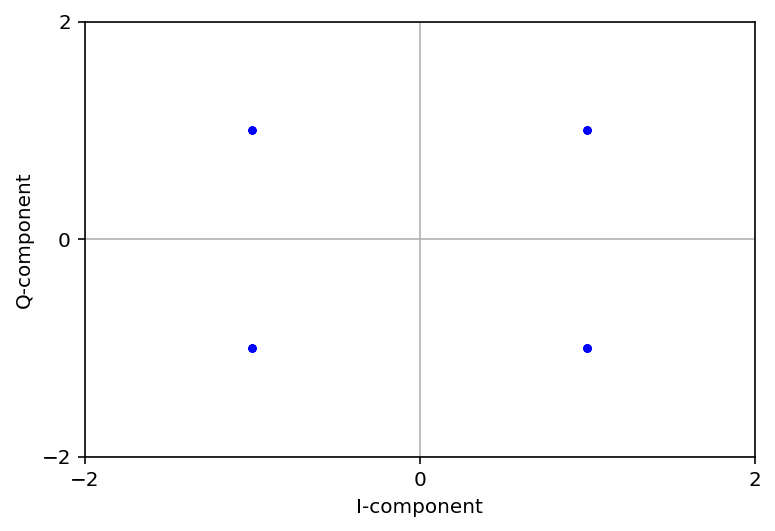

In [5]:
# plot the constellation
#plt.figure(1)
plt.plot(np.real(tx_bb_sym), np.imag(tx_bb_sym), '.b')
plt.xlabel('I-component')
plt.ylabel('Q-component')
plt.xticks(np.arange(-2, 3, 2))
plt.yticks(np.arange(-2, 3, 2))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)

# Data transmission
1400 GHz to 2400 GHz  
Equivalent Sample Rate = 5 Gsps  

1 to 5000 sample  
adjustable  
multipath delay  

Gain Adjustment  

300 in / 11802.86e6 * sin(30) = 12.7 ns  
300 in / 11802.86e6 * sin(60) = 22.0 ns  
Antenna delay simulation valid only at 1666.67 MHz  
Each pointing angle interval center is adjusted to  
correspond to each other as not to introduce a time  
shift in the data during the BER check.  


Antenna Delay Simulator. An averaged summation  
of a series of delays at 3 sample intervals.  
1 interval for 0 degrees  
21 intervals for a 30 degree angle (12 ns spread)  
37 intervals for a 60 degree angle (21.6 ns spread)  



In [6]:
# add noise, Additive White Gaussian Noise (AWGN)
snr_dB = 3

avg_energy = sum(abs(tx_bb_sym) * abs(tx_bb_sym))/len(tx_bb_sym)
snr_linear = 10**(snr_dB/10.0)
noise_variance = avg_energy/(2*snr_linear)

noise = (np.sqrt(noise_variance) * (np.random.random_sample((len(tx_bb_sym),))-0.5) + (np.sqrt(noise_variance) *        (np.random.random_sample((len(tx_bb_sym),))-0.5)*1j))

rx_sig = tx_bb_sym + noise

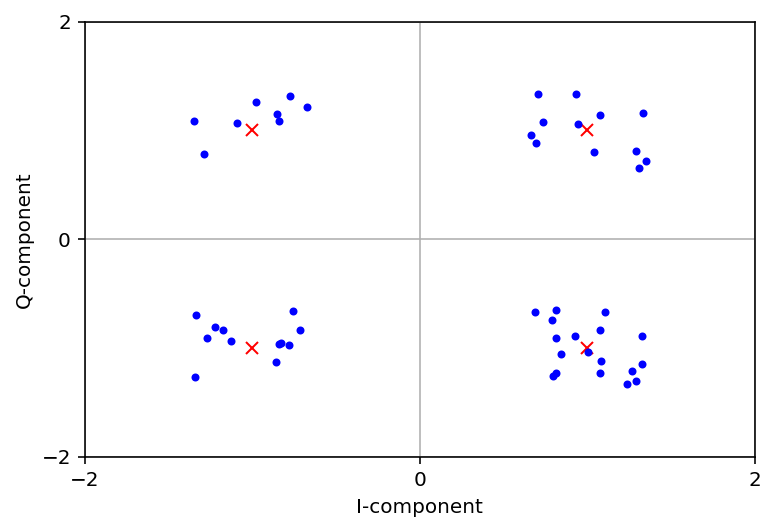

In [7]:
# plot the constellation
sym_marker = np.array([-1.+1.j,  1.-1.j, -1.-1.j,  1.+1.j],complex)
plt.plot(np.real(sym_marker), np.imag(sym_marker), 'xr')
plt.plot(np.real(rx_sig), np.imag(rx_sig), '.b')
plt.xlabel('I-component')
plt.ylabel('Q-component')
plt.xticks(np.arange(-2, 3, 2))
plt.yticks(np.arange(-2, 3, 2))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)

https://www.mathworks.com/help/comm/ug/fading-channels.html  
use the band-limited discrete multipath channel model of section 9.1.3.5.2 in [1].   (see pdf page 590)
The multipath fading channel is modeled as a linear finite impulse-response (FIR) filter.  
Let $s_i$ denote the set of samples at the input to the channel. Then the samples $y_i$ at the output of the channel are related to $s_i$  
  
$y_i=\sum_{n=-N_1}^{N_2} s_{i-n}g_n$  
  
where $g_n$ is the set of tap weights given by:  

$g_n=\sum_{k=1}^{K} a_k sinc[\frac{\tau_k}{T_s}-n], -N_1 \leq n \leq N_2$  
  
In the equations:  
$T_s$  is the input sample period to the channel.  
$\tau_k$, where 1 ≤ k ≤K, is the set of path delays. K is the total number of paths in the multipath fading channel.  
$a_k$, where 1 ≤ k ≤K, is the set of complex path gains of the multipath fading channel. These path gains are uncorrelated with each other.  
$N_1$ and $N_2$ are chosen so that $|g_n|$ is small when n is less than $−N_1$ or greater than $N_2$.  

References
[1] Jeruchim, M. C., Balaban, P., and Shanmugan, K. S., Simulation of Communication Systems, Second Edition, New York, Kluwer Academic/Plenum, 2000.

In [117]:
from scipy.signal import blackmanharris, bartlett, bohman, convolve

#scipy.signal.windows.hamming(M, sym=True)[source]


In [203]:
pathDelays = np.array([0, 0.25, 0.5, 1.0])  # delays are in symbol periods
avgPathGains = np.array([0, -6, -12, -24])  # path gains (dB), later random phase is included

In [204]:
ts = 0.1  # time step, 0.1 is 10 time steps per symbol period
T_sym = 1 # the symbol period
N = 5  # number of symbol periods to evaluate over, maybe make N = 3 times max path delay

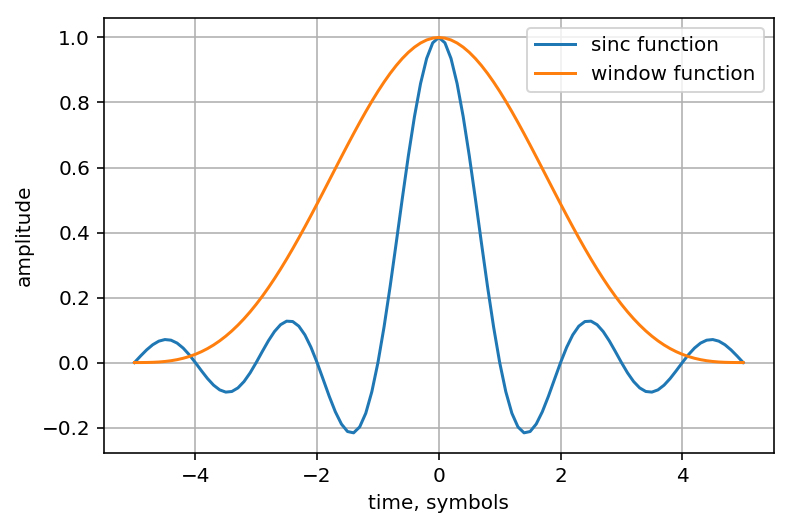

In [100]:
# plot the sinc function
x = np.arange(-N,N+ts,ts)
f = np.sinc(x)
#w = blackmanharris(len(x))
w = bohman(len(x))
plt.plot(x,f,label='sinc function')
plt.plot(x,w,label='window function')

plt.grid()
plt.legend()
#plt.title('w(t) and n(t), equ 2-6 and 2-7')
plt.ylabel('amplitude')
plt.xlabel('time, symbols')

plt.show()

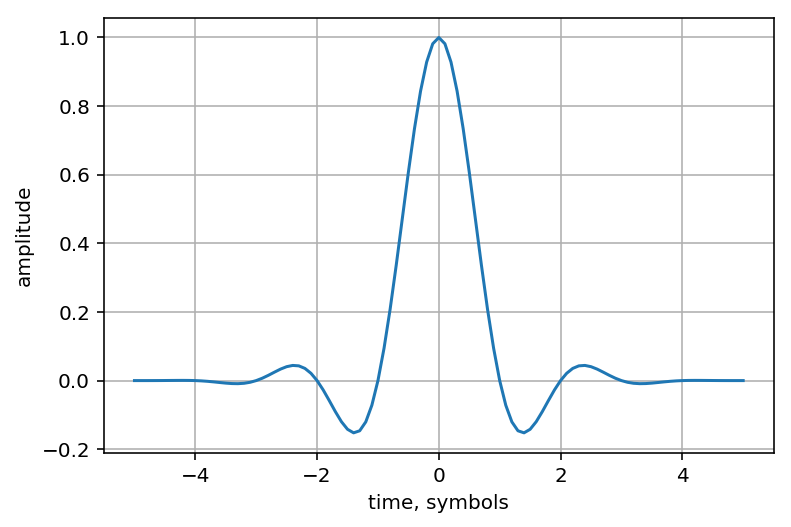

In [101]:
N = 5 # number of symbol periods to evaluate over
t = np.arange(-N*T_sym,N*T_sym+ts,ts)
f = np.sinc(t)
w = bohman(len(t))
q = w*f
plt.plot(t,q)

plt.grid()
#plt.title('SOQPSK-TG impulse response')
plt.ylabel('amplitude')
plt.xlabel('time, symbols')
plt.show()

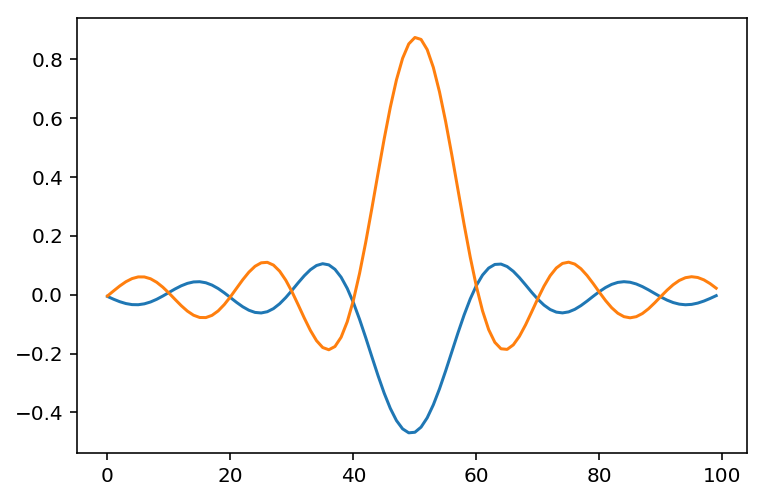

In [102]:
# calculate g_n
tk = pathDelays/ts # path delay scaled to the time step
a = 10**(avgPathGains/10)*np.exp(1j*(np.random.rand(len(avgPathGains))-0.5)*2*np.pi) # convert path gains to linear/complex with random phase
Fs = 1/ts # input sample period
n = np.arange(-N*T_sym,N*T_sym,ts) # -N <= n <= N
g = np.ones((len(tk),len(n)),dtype=complex)
g_n = np.zeros(len(g[0]),dtype=complex)
for k in range(len(tk)):
    g[k] = a[k]*np.sinc(tk[k]/Fs - n)
    g_n += g[k]

plt.plot(np.real(g_n))
plt.plot(np.imag(g_n))
plt.show()

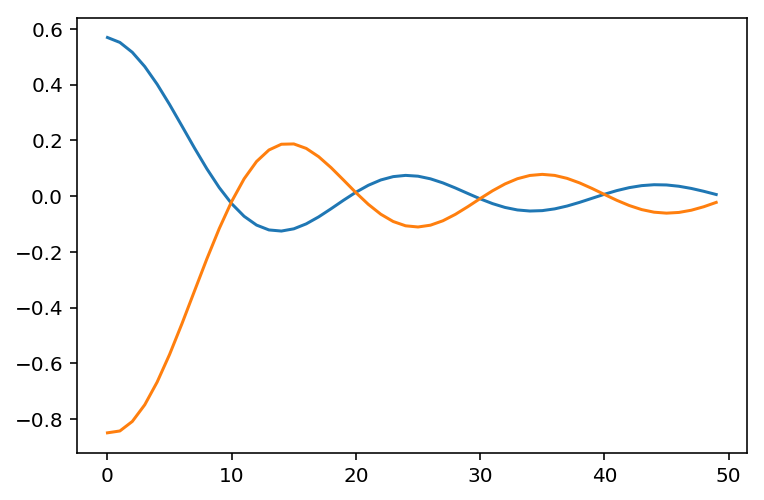

In [214]:
# calculate g_n
tk = pathDelays/ts # path delay scaled to the time step
a = 10**(avgPathGains/10)*np.exp(1j*(np.random.rand(len(avgPathGains))-0.5)*2*np.pi) # convert path gains to linear/complex with random phase
Fs = 1/ts # input sample period
n = np.arange(-N*T_sym,N*T_sym,ts) # -N <= n <= N
n = np.arange(0,N*T_sym,ts) # 0 = n <= N
g = np.ones((len(tk),len(n)),dtype=complex)
g_n = np.zeros(len(g[0]),dtype=complex)
for k in range(len(tk)):
    g[k] = a[k]*np.sinc(tk[k]/Fs - n)
    g_n += g[k]

plt.plot(np.real(g_n))
plt.plot(np.imag(g_n))
plt.show()

In [104]:
# upsample base band data
def upsample(x,L):
    k = []
    for i in range(len(x)):
        y = np.zeros(L,dtype=complex)+x[i]
        y = np.hstack((x[i],y))
        k = np.concatenate((k,y))
    return k

In [215]:
# upsample the data
s_n = upsample(tx_bb_sym,int(1/ts))

In [216]:
# implement a tapped delay line, use g_n as coef to the taps
line = np.zeros(len(g_n)+1,dtype=complex)
y_n = np.zeros(len(s_n),dtype=complex)

for k in range(len(s_n)):

    line[0] = s_n[k]

    # sum all coef and taps
    m = 0
    for i in range(len(g_n)):
        m += line[i]*g_n[i]

    y_n[k] = m # save the sum

    # shift the line
    for j in range(len(g_n)):
        line[j+1] = line[j]


In [134]:
len(y_n)

559

In [207]:
y_n = s_n

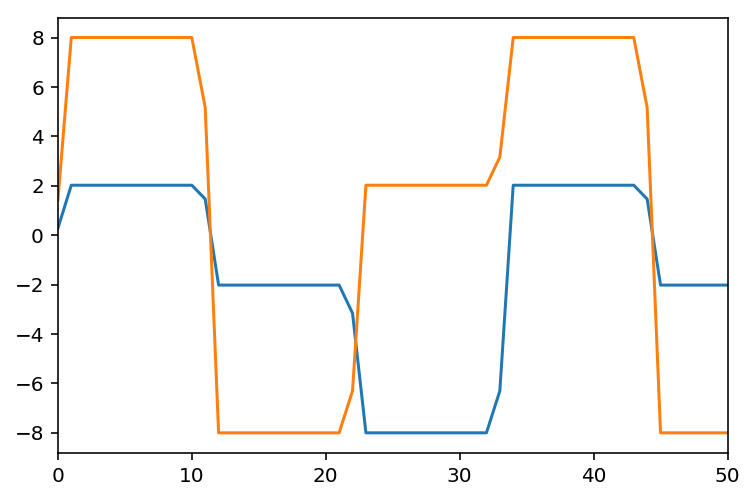

In [217]:
plt.plot(np.real(y_n))
plt.plot(np.imag(y_n))
plt.xlim(0,50)
plt.show()

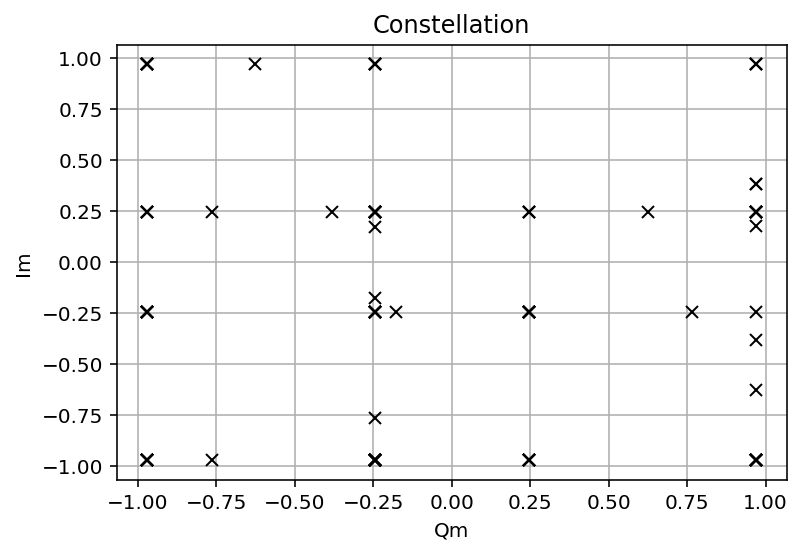

In [218]:
# normalize amplitude
y_n = y_n/np.abs(y_n).max()

# plot center of sysmbol locations
for i in range(0,len(y_n)-int(1/ts),int(1/ts/2)):
    plt.plot(np.real(y_n[i+int(1/ts)]),np.imag(y_n[i-int(1/ts)]),'xk')

plt.grid()
plt.title('Constellation')
plt.ylabel('Im')
plt.xlabel('Qm')

plt.show()

In [151]:
tid, h_rc = rcosfilter(int(1/ts/2), 1, T_sym, 1/ts)
output = convolve(s_n, h_rc)

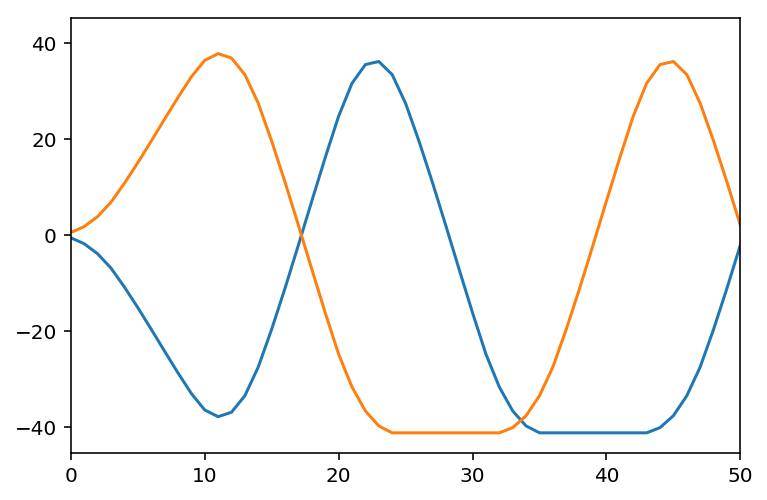

In [152]:
plt.plot(np.real(output))
plt.plot(np.imag(output))
plt.xlim(0,50)
plt.show()

# stopped here


In [0]:
h(n) = (sinc(n/T)*cos(pi * alpha* n /T)) / (1-4*(alpha*n/T)**2)

## try following the matlab communication tool box methods.
https://www.mathworks.com/help/comm/ug/digital-modulation.html

# Raised cosine pulse shaping

In [110]:
def rcosfilter(N, alpha, Ts, Fs):
    """
    Generates a raised cosine (RC) filter (FIR) impulse response.
    Parameters
    ----------
    N : int
        Length of the filter in samples.
    alpha : float
        Roll off factor (Valid values are [0, 1]).
    Ts : float
        Symbol period in seconds.
    Fs : float
        Sampling Rate in Hz.
    Returns
    -------
    h_rc : 1-D ndarray (float)
        Impulse response of the raised cosine filter.
    time_idx : 1-D ndarray (float)
        Array containing the time indices, in seconds, for the impulse response.
    """

    T_delta = 1/float(Fs)
    time_idx = ((np.arange(N)-N/2))*T_delta
    sample_num = np.arange(N)
    h_rc = np.zeros(N, dtype=float)

    for x in sample_num:
        t = (x-N/2)*T_delta
        if t == 0.0:
            h_rc[x] = 1.0
        elif alpha != 0 and t == Ts/(2*alpha):
            h_rc[x] = (np.pi/4)*(np.sin(np.pi*t/Ts)/(np.pi*t/Ts))
        elif alpha != 0 and t == -Ts/(2*alpha):
            h_rc[x] = (np.pi/4)*(np.sin(np.pi*t/Ts)/(np.pi*t/Ts))
        else:
            h_rc[x] = (np.sin(np.pi*t/Ts)/(np.pi*t/Ts))* \
                    (np.cos(np.pi*alpha*t/Ts)/(1-(((2*alpha*t)/Ts)*((2*alpha*t)/Ts))))

    return time_idx, h_rc

# Data reception
Adjustable White  
Noise Generator  

The noise source can be move to
the output of the antenna, since a
normal distribution random
variable is not affected by the
summation of delayed independent
noise sources. In the real world it
would be correct to have noise
originating in the antenna panels.
Just more work to simulate

Local Oscillator at  
70 MHz below the  
selected Frequency  



# FIR LPF
Equivalent Sample Rate = 200 MHz  

# FIR IF filter

# Phase adjusted 70 MHz LO

# Dual FIR low pass base band filters, I & Q

# I channel integrate and dump detector

# Q channel integrate and dump detector

# Serial bit order reconstruction

# Bit error detector